In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import TransformedTargetRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer

In [2]:
df_16=pd.read_excel("3960_2016.xlsx")
df_16.head()

,Neighbourhood Name,Neighbourhood Number,Descriptive Name,Latitude,Longitude,Occurrence Violation Type Group,Occurrence Reported Month,Occurrence Reported Year,Occurrence Reported Quarter,Number of Occurrences,...,Employment_No Response,"Income_Less than $30,","Income_$30,000 to les","Income_$60,000 to les","Income_$100,000 to le","Income_$125,000 to le","Income_$150,000 to le","Income_$200,000 to le","Income_$250,000 or mo",Income_No Response
0,ABBOTTSFIELD,2010,Abbottsfield,53.574143,-113.388758,Assault,7,2016,Q3,4,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
1,ABBOTTSFIELD,2010,Abbottsfield,53.574143,-113.388758,Theft From Vehicle,9,2016,Q3,1,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
2,ABBOTTSFIELD,2010,Abbottsfield,53.574143,-113.388758,Theft From Vehicle,1,2016,Q1,1,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
3,ABBOTTSFIELD,2010,Abbottsfield,53.574143,-113.388758,Assault,11,2016,Q4,1,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
4,ABBOTTSFIELD,2010,Abbottsfield,53.574143,-113.388758,Assault,6,2016,Q2,1,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0


In [3]:
df_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11132 entries, 0 to 11131
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Neighbourhood Name               11132 non-null  object        
 1   Neighbourhood Number             11132 non-null  int64         
 2   Descriptive Name                 11132 non-null  object        
 3   Latitude                         11132 non-null  float64       
 4   Longitude                        11132 non-null  float64       
 5   Occurrence Violation Type Group  11132 non-null  object        
 6   Occurrence Reported Month        11132 non-null  int64         
 7   Occurrence Reported Year         11132 non-null  int64         
 8   Occurrence Reported Quarter      11132 non-null  object        
 9   Number of Occurrences            11132 non-null  int64         
 10  Month-Year                       11132 non-null  datetime6

In [4]:
# Convert the Numerical Months to String Months in 'Occurrence Reported Month'
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
               6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October',
               11: 'November', 12: 'December'}

# use the loc accessor to replace month_num column with corresponding month names
df_16['Occurrence Reported Month'] = df_16['Occurrence Reported Month'].map(month_names)

df_16.head()

,Neighbourhood Name,Neighbourhood Number,Descriptive Name,Latitude,Longitude,Occurrence Violation Type Group,Occurrence Reported Month,Occurrence Reported Year,Occurrence Reported Quarter,Number of Occurrences,...,Employment_No Response,"Income_Less than $30,","Income_$30,000 to les","Income_$60,000 to les","Income_$100,000 to le","Income_$125,000 to le","Income_$150,000 to le","Income_$200,000 to le","Income_$250,000 or mo",Income_No Response
0,ABBOTTSFIELD,2010,Abbottsfield,53.574143,-113.388758,Assault,July,2016,Q3,4,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
1,ABBOTTSFIELD,2010,Abbottsfield,53.574143,-113.388758,Theft From Vehicle,September,2016,Q3,1,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
2,ABBOTTSFIELD,2010,Abbottsfield,53.574143,-113.388758,Theft From Vehicle,January,2016,Q1,1,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
3,ABBOTTSFIELD,2010,Abbottsfield,53.574143,-113.388758,Assault,November,2016,Q4,1,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
4,ABBOTTSFIELD,2010,Abbottsfield,53.574143,-113.388758,Assault,June,2016,Q2,1,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0


In [5]:
# Drop the following two columns as we have no need for them.
df_16.drop(['Descriptive Name', 'Month-Year', 'Month-Year.1'], axis=1, inplace =True)
df_16

,Neighbourhood Name,Neighbourhood Number,Latitude,Longitude,Occurrence Violation Type Group,Occurrence Reported Month,Occurrence Reported Year,Occurrence Reported Quarter,Number of Occurrences,Air Temp. Avg. Min. (°C),...,Employment_No Response,"Income_Less than $30,","Income_$30,000 to les","Income_$60,000 to les","Income_$100,000 to le","Income_$125,000 to le","Income_$150,000 to le","Income_$200,000 to le","Income_$250,000 or mo",Income_No Response
0,ABBOTTSFIELD,2010,53.574143,-113.388758,Assault,July,2016,Q3,4,11.852258,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
1,ABBOTTSFIELD,2010,53.574143,-113.388758,Theft From Vehicle,September,2016,Q3,1,4.671000,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
2,ABBOTTSFIELD,2010,53.574143,-113.388758,Theft From Vehicle,January,2016,Q1,1,-14.773871,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
3,ABBOTTSFIELD,2010,53.574143,-113.388758,Assault,November,2016,Q4,1,-2.935667,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
4,ABBOTTSFIELD,2010,53.574143,-113.388758,Assault,June,2016,Q2,1,9.963333,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11127,YOUNGSTOWN INDUSTRIAL,4660,53.552476,-113.610588,Theft Of Vehicle,July,2016,Q3,1,11.852258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11128,YOUNGSTOWN INDUSTRIAL,4660,53.552476,-113.610588,Assault,February,2016,Q1,1,-7.270690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11129,YOUNGSTOWN INDUSTRIAL,4660,53.552476,-113.610588,Assault,September,2016,Q3,1,4.671000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11130,YOUNGSTOWN INDUSTRIAL,4660,53.552476,-113.610588,Theft Over $5000,June,2016,Q2,1,9.963333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_16.isnull().sum()

Neighbourhood Name                  0
Neighbourhood Number                0
Latitude                            0
Longitude                           0
Occurrence Violation Type Group     0
Occurrence Reported Month           0
Occurrence Reported Year            0
Occurrence Reported Quarter         0
Number of Occurrences               0
Air Temp. Avg. Min. (°C)            0
Air Temp. Avg. Max. (°C)            0
Edu_Preschool                      19
Edu_Kindergarten                   19
Edu_Gr.7 - Gr.9                    19
Edu_Gr.10 - Gr.12                  19
Edu_Post Secondar                  19
Homemaker                          19
Employedage0-30                    19
Employed 30+                       19
Unemployed                         19
Retired                            19
Permanently U                      19
Employment_No Response             19
Income_Less than $30,              19
Income_$30,000 to les              19
Income_$60,000 to les              19
Income_$100,

In [7]:
# Visualize Null Values in df_16 by rows
a=df_16[df_16.isnull().any(axis=1)]
a

,Neighbourhood Name,Neighbourhood Number,Latitude,Longitude,Occurrence Violation Type Group,Occurrence Reported Month,Occurrence Reported Year,Occurrence Reported Quarter,Number of Occurrences,Air Temp. Avg. Min. (°C),...,Employment_No Response,"Income_Less than $30,","Income_$30,000 to les","Income_$60,000 to les","Income_$100,000 to le","Income_$125,000 to le","Income_$150,000 to le","Income_$200,000 to le","Income_$250,000 or mo",Income_No Response
386,ASTER,6445,53.451654,-113.358230,Theft Over $5000,August,2016,Q3,1,10.251935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,ASTER,6445,53.451654,-113.358230,Break and Enter,January,2016,Q1,1,-14.773871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2801,DECOTEAU,6663,53.410339,-113.369086,Break and Enter,September,2016,Q3,1,4.671000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2802,DECOTEAU,6663,53.410339,-113.369086,Sexual Assaults,September,2016,Q3,1,4.671000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2803,DECOTEAU,6663,53.410339,-113.369086,Theft From Vehicle,April,2016,Q2,1,0.897000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2804,DECOTEAU,6663,53.410339,-113.369086,Assault,May,2016,Q2,1,4.837097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2805,DECOTEAU,6663,53.410339,-113.369086,Assault,July,2016,Q3,1,11.852258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2806,DECOTEAU,6663,53.410339,-113.369086,Theft Of Vehicle,March,2016,Q1,1,-2.821613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2807,DECOTEAU,6663,53.410339,-113.369086,Theft Of Vehicle,February,2016,Q1,1,-7.270690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2808,DECOTEAU,6663,53.410339,-113.369086,Break and Enter,June,2016,Q2,1,9.963333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# This are new areas in the City of Edmonton. They can be dropped from the dataframe.
a['Neighbourhood Name'].value_counts()

DECOTEAU        11
RIVER'S EDGE     4
ASTER            2
THE UPLANDS      2
Name: Neighbourhood Name, dtype: int64

In [9]:
# Drop all rows corresponding to the null values
df_16=df_16.dropna(how='any', axis=0)

In [10]:
# Double check to see if they are dropped.
df_16.isnull().sum()

Neighbourhood Name                 0
Neighbourhood Number               0
Latitude                           0
Longitude                          0
Occurrence Violation Type Group    0
Occurrence Reported Month          0
Occurrence Reported Year           0
Occurrence Reported Quarter        0
Number of Occurrences              0
Air Temp. Avg. Min. (°C)           0
Air Temp. Avg. Max. (°C)           0
Edu_Preschool                      0
Edu_Kindergarten                   0
Edu_Gr.7 - Gr.9                    0
Edu_Gr.10 - Gr.12                  0
Edu_Post Secondar                  0
Homemaker                          0
Employedage0-30                    0
Employed 30+                       0
Unemployed                         0
Retired                            0
Permanently U                      0
Employment_No Response             0
Income_Less than $30,              0
Income_$30,000 to les              0
Income_$60,000 to les              0
Income_$100,000 to le              0
I

In [11]:
df_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11113 entries, 0 to 11131
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Neighbourhood Name               11113 non-null  object 
 1   Neighbourhood Number             11113 non-null  int64  
 2   Latitude                         11113 non-null  float64
 3   Longitude                        11113 non-null  float64
 4   Occurrence Violation Type Group  11113 non-null  object 
 5   Occurrence Reported Month        11113 non-null  object 
 6   Occurrence Reported Year         11113 non-null  int64  
 7   Occurrence Reported Quarter      11113 non-null  object 
 8   Number of Occurrences            11113 non-null  int64  
 9   Air Temp. Avg. Min. (°C)         11113 non-null  float64
 10  Air Temp. Avg. Max. (°C)         11113 non-null  float64
 11  Edu_Preschool                    11113 non-null  float64
 12  Edu_Kindergarten  

In [12]:
# Convert Year column to string
df_16['Occurrence Reported Year'] = df_16['Occurrence Reported Year'].astype(str)

C:\Users\navne\AppData\Local\Temp\ipykernel_35056\1493417966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_16['Occurrence Reported Year'] = df_16['Occurrence Reported Year'].astype(str)


In [13]:
# double check to make sure it worked
df_16['Occurrence Reported Year'].dtype

dtype('O')

In [14]:
# What are the different types of Violations within the Occurrence Violation Type Group column.
df_16['Occurrence Violation Type Group'].value_counts()

Theft From Vehicle    2999
Break and Enter       2409
Theft Of Vehicle      2107
Assault               1934
Robbery                716
Sexual Assaults        543
Theft Over $5000       381
Homicide                24
Name: Occurrence Violation Type Group, dtype: int64

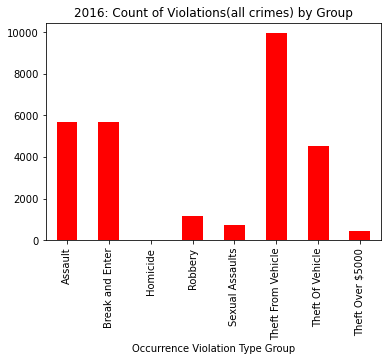

In [15]:
#what type of crimes are reported most?
fig, ax = plt.subplots(1, 1)
  
# draw graph

df_16.groupby (['Occurrence Violation Type Group'])['Number of Occurrences'].sum().plot(kind='bar',color='red')
plt.title('2016: Count of Violations(all crimes) by Group')
plt.show()

In [16]:
df_violent = df_16[df_16['Occurrence Violation Type Group'].isin(['Assault','Robbery','Sexual Assaults','Homicide'])]

<AxesSubplot:xlabel='Number of Occurrences', ylabel='Count'>

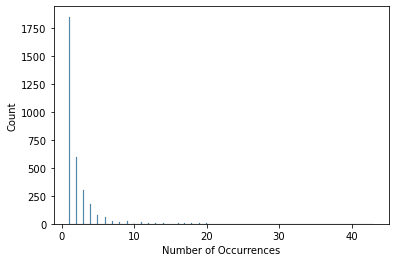

In [17]:
sns.histplot(df_violent['Number of Occurrences'])

<AxesSubplot:xlabel='Number of Occurrences', ylabel='Count'>

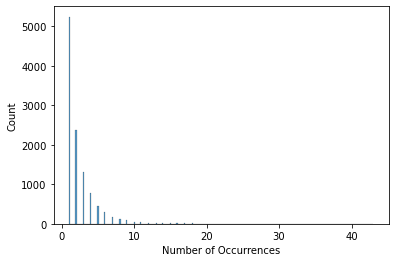

In [18]:
sns.histplot(df_16['Number of Occurrences'])

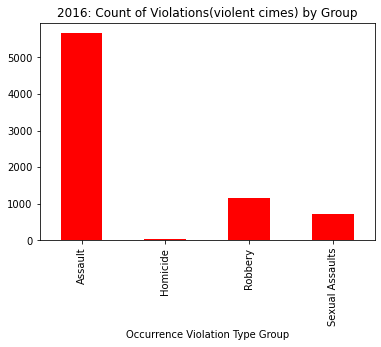

In [19]:
df_violent.groupby (['Occurrence Violation Type Group'])['Number of Occurrences'].sum().plot(kind='bar',color='red')
plt.title('2016: Count of Violations(violent cimes) by Group')

plt.show()

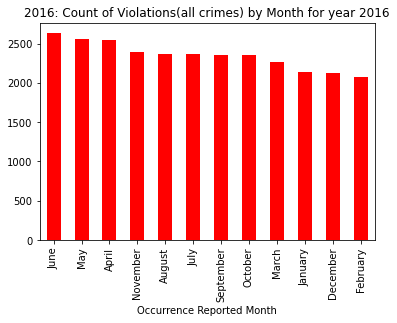

In [20]:
#In which month crime numbers were high?
df_16.groupby (['Occurrence Reported Month'])['Number of Occurrences'].sum().sort_values(ascending=False).plot(kind='bar',color='red')
plt.title('2016: Count of Violations(all crimes) by Month for year 2016')
plt.show()

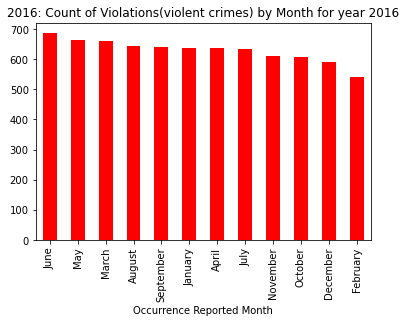

In [21]:
df_violent.groupby (['Occurrence Reported Month'])['Number of Occurrences'].sum().sort_values(ascending=False).plot(kind='bar',color='red')
plt.title('2016: Count of Violations(violent crimes) by Month for year 2016')
plt.show()

In [22]:
df_16['Occurrence Violation Type Group'].value_counts()

Theft From Vehicle    2999
Break and Enter       2409
Theft Of Vehicle      2107
Assault               1934
Robbery                716
Sexual Assaults        543
Theft Over $5000       381
Homicide                24
Name: Occurrence Violation Type Group, dtype: int64

In [23]:
df_violent.columns

Index(['Neighbourhood Name', 'Neighbourhood Number', 'Latitude', 'Longitude',
       'Occurrence Violation Type Group', 'Occurrence Reported Month',
       'Occurrence Reported Year', 'Occurrence Reported Quarter',
       'Number of Occurrences', 'Air Temp. Avg. Min. (°C)',
       'Air Temp. Avg. Max. (°C)', 'Edu_Preschool', 'Edu_Kindergarten ',
       'Edu_Gr.7 - Gr.9', 'Edu_Gr.10 - Gr.12', 'Edu_Post Secondar',
       'Homemaker', 'Employedage0-30', 'Employed 30+ ', 'Unemployed',
       'Retired', 'Permanently U', 'Employment_No Response',
       'Income_Less than $30,', 'Income_$30,000 to les',
       'Income_$60,000 to les', 'Income_$100,000 to le',
       'Income_$125,000 to le', 'Income_$150,000 to le',
       'Income_$200,000 to le', 'Income_$250,000 or mo', 'Income_No Response'],
      dtype='object')

In [24]:
df_violent.dtypes

Neighbourhood Name                  object
Neighbourhood Number                 int64
Latitude                           float64
Longitude                          float64
Occurrence Violation Type Group     object
Occurrence Reported Month           object
Occurrence Reported Year            object
Occurrence Reported Quarter         object
Number of Occurrences                int64
Air Temp. Avg. Min. (°C)           float64
Air Temp. Avg. Max. (°C)           float64
Edu_Preschool                      float64
Edu_Kindergarten                   float64
Edu_Gr.7 - Gr.9                    float64
Edu_Gr.10 - Gr.12                  float64
Edu_Post Secondar                  float64
Homemaker                          float64
Employedage0-30                    float64
Employed 30+                       float64
Unemployed                         float64
Retired                            float64
Permanently U                      float64
Employment_No Response             float64
Income_Less

In [25]:
df_violent.duplicated().any()

False

In [26]:
#Data split and categorical and numerical features
y= df_violent["Number of Occurrences"]
X = df_violent.drop(columns={"Number of Occurrences"})
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)
numeric_features = ['Air Temp. Avg. Min. (°C)',
'Air Temp. Avg. Max. (°C)', 'Edu_Preschool', 'Edu_Kindergarten ','Edu_Gr.7 - Gr.9', 'Edu_Gr.10 - Gr.12', 'Edu_Post Secondar','Homemaker', 'Employedage0-30', 'Employed 30+ ', 'Unemployed',
 'Retired', 'Permanently U', 'Employment_No Response',
       'Income_Less than $30,', 'Income_$30,000 to les',
       'Income_$60,000 to les', 'Income_$100,000 to le',
       'Income_$125,000 to le', 'Income_$150,000 to le',
       'Income_$200,000 to le', 'Income_$250,000 or mo', 'Income_No Response']
numeric_transformer = Pipeline( steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())])

categorical_features =['Occurrence Violation Type Group','Occurrence Reported Month','Occurrence Reported Year','Neighbourhood Name']
categorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")),("encoder", OneHotEncoder(handle_unknown="ignore"))])
preprocessor = ColumnTransformer( remainder='drop',
        transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features) ])

In [27]:
# Define the models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Elastic Net', ElasticNet(max_iter=7600)),
    ('Random Forest', RandomForestRegressor()),
    ('SGD', SGDRegressor(max_iter=7500)),
    ('Extra Trees', ExtraTreesRegressor()),
    ('XGBoost', XGBRegressor(objective='reg:squarederror')),
    ('Gradient Boosting', GradientBoostingRegressor()),
]

# Evaluate models with r2
for name, model in models:
    pipe = Pipeline([
        ('preprocessing', preprocessor),
        ('model',model)
    ])
    pipe.fit(X_train, y_train)
    print("Training scores: ", name, pipe.score(X_train,y_train))
    print("Testing Score: ",name,  pipe.score(X_test,y_test))

Training scores:  Linear Regression 0.5114697051189974
Testing Score:  Linear Regression 0.47499293256398145
Training scores:  Elastic Net 0.14501856776958255
Testing Score:  Elastic Net 0.14224175506302228
Training scores:  Random Forest 0.9753425366589099
Testing Score:  Random Forest 0.8603842746814306
Training scores:  SGD 0.4509946194594371
Testing Score:  SGD 0.43789567043767574
Training scores:  Extra Trees 1.0
Testing Score:  Extra Trees 0.8400012839318216
Training scores:  XGBoost 0.9551416052427224
Testing Score:  XGBoost 0.8479259579538855
Training scores:  Gradient Boosting 0.8669976748236528
Testing Score:  Gradient Boosting 0.8483436867039719


In [28]:
pipe['preprocessing'].transformers_[1][1]\
    ['encoder'].get_feature_names(categorical_features)

c:\Users\navne\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['Occurrence Violation Type Group_Assault',
       'Occurrence Violation Type Group_Homicide',
       'Occurrence Violation Type Group_Robbery',
       'Occurrence Violation Type Group_Sexual Assaults',
       'Occurrence Reported Month_April',
       'Occurrence Reported Month_August',
       'Occurrence Reported Month_December',
       'Occurrence Reported Month_February',
       'Occurrence Reported Month_January',
       'Occurrence Reported Month_July', 'Occurrence Reported Month_June',
       'Occurrence Reported Month_March', 'Occurrence Reported Month_May',
       'Occurrence Reported Month_November',
       'Occurrence Reported Month_October',
       'Occurrence Reported Month_September',
       'Occurrence Reported Year_2016', 'Neighbourhood Name_ABBOTTSFIELD',
       'Neighbourhood Name_ALBANY', 'Neighbourhood Name_ALBERTA AVENUE',
       'Neighbourhood Name_ALDERGROVE', 'Neighbourhood Name_ALLARD',
       'Neighbourhood Name_ALLENDALE', 'Neighbourhood Name_AMBLESIDE',

In [29]:
#optimizing best model-- random forest regressor

# Define the best model pipeline
best_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor())])
# Define the grid of hyperparameters to search over
param_grid = {'model__bootstrap': [True,False],
    #'model__max_depth': [80, 90, 100, 110],
    'model__max_features': ['sqrt'],
    'model__min_samples_leaf': [2,3,4],
    #'model__min_samples_split': [3,4,5],
    'model__n_estimators': [250,500]
    }
# Define the transformed target regressor with grid search pipeline
best_grid_search_pipeline = GridSearchCV((best_pipeline),param_grid=param_grid, cv=5, n_jobs=-1, 
                                                                                             scoring='r2')
# Train the model
best_grid_search_pipeline.fit(X_train, y_train.ravel())
# Evaluate the model on the test set
testscore = best_grid_search_pipeline.score(X_test, y_test.ravel())
trainscore= best_grid_search_pipeline.score(X_train, y_train.ravel())
print(f"Test score: {testscore:.3f}")
print(f"Train score:{trainscore:.3f}")
y_pred = best_grid_search_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Test RMSE:', rmse)


Test score: 0.713
Train score:0.791
Test RMSE: 1.8926778124353023


  To optimize best model,a range of values for  hyperparameters of the RandomForestRegressor model - n_estimators, min_sample_leaf,min_sample_split and max_features,bootstrap were defined.It was observed that On increasing min_ample_split,r2 scores decreased.So,range from 2-4 was given.For min_sample_leaf,range from 2-10 was tested and on increasing  value from 5, r2 scores started to decrease.For n_estimators,it was observed that increasing numbers from 600 training time for model was increased and processing time was decreased. The GridSearchCV algorithm  trained and evaluated the model for every possible combination of these hyperparameter values using cross-validation. Finally, the algorithm returned the best combination of hyperparameters that resulted in the lowest mean squared error.
 

In [30]:
#parameters tuned --random forest regressor
best_grid_search_pipeline.best_params_

{'model__bootstrap': False,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 2,
 'model__n_estimators': 500}

In [31]:
#optimizing best model-- Gradient boosting

# Define the best model pipeline
best_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', GradientBoostingRegressor())])
# Define the grid of hyperparameters to search over
param_grid = param_grid = {
    #'model__min_samples_leaf': [2,3,4],
    #'model__min_samples_split': [3,5,6],
    'model__max_features': ['sqrt', 'log2'],
    "model__n_estimators":[500],
    "model__max_depth":[3,4,5],
    "model__learning_rate":[0.01,0.05,0.2],
    "model__alpha":[0.1,0.5],
    #'model__subsample':[0.85,0.9]
    }
# Define the transformed target regressor with grid search pipeline
best_grid_search_pipeline = GridSearchCV((best_pipeline),param_grid=param_grid, cv=5, n_jobs=-1, 
                                                                                             scoring='r2')
# Train the model
best_grid_search_pipeline.fit(X_train, y_train.ravel())
# Evaluate the model on the test set
testscore = best_grid_search_pipeline.score(X_test, y_test.ravel())
trainscore= best_grid_search_pipeline.score(X_train, y_train.ravel())
print(f"Test score: {testscore:.3f}")
print(f"Train score:{trainscore:.3f}")
y_pred = best_grid_search_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Test RMSE:', rmse)
print(best_grid_search_pipeline.best_params_)


Test score: 0.815
Train score:0.915
Test RMSE: 1.5200441158068245
{'model__alpha': 0.5, 'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__n_estimators': 500}


### Hyperparameter Changes

<li>tried various learning rates upto 10 but observed  with smaller learning rate there was less difference in train and test score ,so decide to go upto 0.2.
<li>tried a bunch of values for number of trees but takes a long time specially with large number of trees ,so not using it 
<li>increasing max depth reduced efficiency,so decided to chose upto 5.
<li>tried various values for subsample,but changing it does not affect much on efficiency but increase time so going with default value.
<li>smaller alpha values like 0.01 takes larger time (upto 2 mins )(not much improvement in scores),so decided to go with values from 0.1 to 1.0

In [32]:
#optimizing best model-- XG Boost regressor

# Define the best model pipeline
best_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', XGBRegressor())])
# Define the grid of hyperparameters to search over
param_grid = {"model__learning_rate"    : [0.05, 0.10,0.20, 0.30 ] ,
 "model__max_depth"        : [ 3, 4, 5],
 "model__min_child_weight" : [ 1, 3, 5 ],
 "model__gamma"            : [ 0.1, 0.2  ],
 "model__colsample_bytree" : [ 0.3, 0.5 , 0.7 ] }
    
# Define the transformed target regressor with grid search pipeline
best_grid_search_pipeline = GridSearchCV((best_pipeline),param_grid=param_grid, cv=5, n_jobs=-1, 
                                                                                             scoring='r2')
# Train the model
best_grid_search_pipeline.fit(X_train, y_train.ravel())
# Evaluate the model on the test set
testscore = best_grid_search_pipeline.score(X_test, y_test.ravel())
trainscore= best_grid_search_pipeline.score(X_train, y_train.ravel())
print(f"Test score: {testscore:.3f}")
print(f"Train score:{trainscore:.3f}")
y_pred = best_grid_search_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Test RMSE:', rmse)
print(best_grid_search_pipeline.best_params_)



Test score: 0.862
Train score:0.887
Test RMSE: 1.3114881950834085
{'model__colsample_bytree': 0.7, 'model__gamma': 0.1, 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__min_child_weight': 5}


In [33]:
# Define the models(using Transformed Target Regressor) to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Elastic Net', ElasticNet(max_iter=7600)),
    ('Random Forest', RandomForestRegressor()),
    ('SGD', SGDRegressor(max_iter=7500)),
    ('Extra Trees', ExtraTreesRegressor()),
    ('XGBoost', XGBRegressor(objective='reg:squarederror')),
    ('Gradient Boosting', GradientBoostingRegressor()),
]

# Evaluate models with r2
for name, model in models:
    pipe = Pipeline([
        ('preprocessing', preprocessor),
        ('model',TransformedTargetRegressor(regressor= model,#transformer=PowerTransformer()
                                            ))
    ])
    pipe.fit(X_train, y_train)
    print("Training scores: ", name, pipe.score(X_train,y_train))
    print("Testing Score: ",name,  pipe.score(X_test,y_test))

Training scores:  Linear Regression 0.5114697051189974
Testing Score:  Linear Regression 0.47499293256398145
Training scores:  Elastic Net 0.14501856776958255
Testing Score:  Elastic Net 0.14224175506302228
Training scores:  Random Forest 0.9747907180703035
Testing Score:  Random Forest 0.8575110999870945
Training scores:  SGD 0.4340637622881234
Testing Score:  SGD 0.42048012480309604
Training scores:  Extra Trees 1.0
Testing Score:  Extra Trees 0.8400773497071056
Training scores:  XGBoost 0.9551416052427224
Testing Score:  XGBoost 0.8479259579538855
Training scores:  Gradient Boosting 0.8669976748236528
Testing Score:  Gradient Boosting 0.8482515536137614


In [34]:
#optimizing best model-- random forest regressor with transformed Target regressor

# Define the best model pipeline
best_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor())])
# Define the grid of hyperparameters to search over
param_grid = {'model__bootstrap': [True,False],
    #'model__max_depth': [80, 90, 100, 110],
    'model__max_features': ['sqrt'],
    'model__min_samples_leaf': [2,3,4],
    #'model__min_samples_split': [3,4,5],
    'model__n_estimators': [250,500]
    }
# Define the transformed target regressor with grid search pipeline

best_grid_search_pipeline = TransformedTargetRegressor(regressor=GridSearchCV((best_pipeline), 
                                                                                             param_grid=param_grid, cv=5, n_jobs=-1, 
                                                                                             scoring='r2') )
# Train the model
best_grid_search_pipeline.fit(X_train, y_train.ravel())
# Evaluate the model on the test set
testscore = best_grid_search_pipeline.score(X_test, y_test.ravel())
trainscore= best_grid_search_pipeline.score(X_train, y_train.ravel())
print(f"Test score: {testscore:.3f}")
print(f"Train score:{trainscore:.3f}")
y_pred = best_grid_search_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Test RMSE:', rmse)



Test score: 0.707
Train score:0.785
Test RMSE: 1.9115386709825657


In [35]:
best_params = best_grid_search_pipeline.regressor_.best_params_
print(best_params)


{'model__bootstrap': False, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__n_estimators': 250}


In [36]:
# Define the best model pipeline-- XG boosting with transformed Target regressor
best_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', XGBRegressor())])
# Define the grid of hyperparameters to search over
param_grid = {"model__learning_rate"    : [0.05, 0.10,0.20, 0.30 ] ,
 "model__max_depth"        : [ 3, 4, 5],
 "model__min_child_weight" : [ 1, 3, 5 ],
 "model__gamma"            : [ 0.1, 0.2  ],
 "model__colsample_bytree" : [ 0.3, 0.5 , 0.7 ] }
# Define the transformed target regressor with grid search pipeline

best_grid_search_pipeline_xgb = TransformedTargetRegressor(regressor=GridSearchCV((best_pipeline), 
                                                                                             param_grid=param_grid, cv=5, n_jobs=-1, 
                                                                                             scoring='r2') )
# Train the model
best_grid_search_pipeline_xgb.fit(X_train, y_train.ravel())
# Evaluate the model on the test set
testscore = best_grid_search_pipeline_xgb.score(X_test, y_test.ravel())
trainscore= best_grid_search_pipeline_xgb.score(X_train, y_train.ravel())
print(f"Test score: {testscore:.3f}")
print(f"Train score:{trainscore:.3f}")
y_pred = best_grid_search_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Test RMSE:', rmse)
best_params = best_grid_search_pipeline_xgb.regressor_.best_params_
print(best_params)

Test score: 0.862
Train score:0.887
Test RMSE: 1.9115386709825657
{'model__colsample_bytree': 0.7, 'model__gamma': 0.1, 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__min_child_weight': 5}


In [37]:
# Define the best model pipeline--Gradient boosting with transformed Target regressor
best_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', GradientBoostingRegressor())])
# Define the grid of hyperparameters to search over
param_grid = param_grid = {
    #'model__min_samples_leaf': [2,3,4],
    #'model__min_samples_split': [3,5,6],
    'model__max_features': ['sqrt', 'log2'],
    "model__n_estimators":[500],
    "model__max_depth":[3,4,5],
    "model__learning_rate":[0.01,0.05,0.2],
    "model__alpha":[0.1,0.5],
    #'model__subsample':[0.85,0.9]
    }
# Define the transformed target regressor with grid search pipeline

best_grid_search_pipeline_gb = TransformedTargetRegressor(regressor=GridSearchCV((best_pipeline), 
                                                                                             param_grid=param_grid, cv=5, n_jobs=-1, 
                                                                                             scoring='r2') )
# Train the model
best_grid_search_pipeline_gb.fit(X_train, y_train.ravel())
# Evaluate the model on the test set
testscore = best_grid_search_pipeline_gb.score(X_test, y_test.ravel())
trainscore= best_grid_search_pipeline_gb.score(X_train, y_train.ravel())
print(f"Test score: {testscore:.3f}")
print(f"Train score:{trainscore:.3f}")
y_pred = best_grid_search_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Test RMSE:', rmse)
best_params = best_grid_search_pipeline_gb.regressor_.best_params_
print(best_params)

Test score: 0.801
Train score:0.882
Test RMSE: 1.9115386709825657
{'model__alpha': 0.1, 'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__max_features': 'sqrt', 'model__n_estimators': 500}


cross_val, mean r2 score:  -2399202572759729.0 , same as RFECV score with all features
no of feat:  3
Optimal number of features : 3


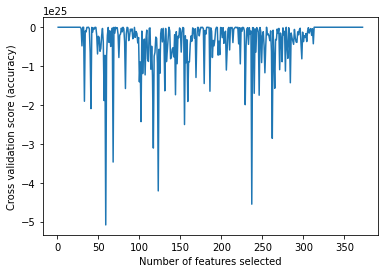

Test Score after feature Selection 0.2628180348964472
test RMSE with rfecv 1.9115386709825657


In [38]:
#feature selection using recursive feature elimination cross validation
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score


class myestimator(TransformedTargetRegressor):

    def __init__(self,**kwargs):
        super().__init__()

    def fit(self, X, y, **kwargs):
        super().fit(X, y, **kwargs)  
        self.coef_ = self.regressor_.coef_
        return self
x_reg_dum = pd.get_dummies(X, drop_first=True)
estimator = myestimator(model=best_grid_search_pipeline_gb)
min_features_to_select=1
selector = RFECV(estimator, step=1, cv=3, scoring='r2')
selector = selector.fit(x_reg_dum, y)
#print("RFECV, r2 scores: ", np.round(selector.grid_scores_,2))
scores = cross_val_score(estimator, x_reg_dum, y, cv=5)
print("cross_val, mean r2 score: ", round(np.mean(scores),2), ", same as RFECV score with all features") 
print("no of feat: ", selector.n_features_ )
print("Optimal number of features : %d" %selector.n_features_)
mask = selector.support_
new_features = x_reg_dum.columns[mask]
#print(new_features)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(selector.cv_results_["mean_test_score"]) + min_features_to_select),
    selector.cv_results_["mean_test_score"],
)
plt.show()
Xreg_train, Xreg_test, yreg_train, yreg_test = train_test_split(x_reg_dum, y)
print("Test Score after feature Selection",selector.score(Xreg_test,yreg_test))
yreg_pred = selector.predict(Xreg_test)
reg_mse = mean_squared_error(yreg_test, yreg_pred)
reg_rmse = np.sqrt(mse)
print("test RMSE with rfecv",reg_rmse)

cross_val, mean r2 score:  -2399202572759729.0 , same as RFECV score with all features
no of feat:  3
Optimal number of features : 3


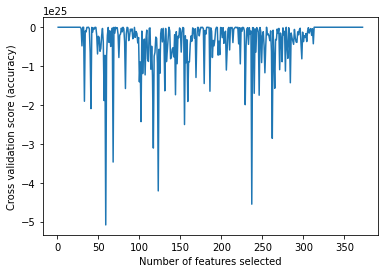

Test Score after feature Selection 0.3811899375740453
test RMSE with rfecv 1.9115386709825657


In [39]:
#feature selection using recursive feature elimination cross validation
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score


class myestimator(TransformedTargetRegressor):

    def __init__(self,**kwargs):
        super().__init__()

    def fit(self, X, y, **kwargs):
        super().fit(X, y, **kwargs)  
        self.coef_ = self.regressor_.coef_
        return self
x_reg_dum = pd.get_dummies(X, drop_first=True)
estimator = myestimator(model=best_grid_search_pipeline_xgb)
min_features_to_select=1
selector = RFECV(estimator, step=1, cv=3, scoring='r2')
selector = selector.fit(x_reg_dum, y)
#print("RFECV, r2 scores: ", np.round(selector.grid_scores_,2))
scores = cross_val_score(estimator, x_reg_dum, y, cv=5)
print("cross_val, mean r2 score: ", round(np.mean(scores),2), ", same as RFECV score with all features") 
print("no of feat: ", selector.n_features_ )
print("Optimal number of features : %d" %selector.n_features_)
mask = selector.support_
new_features = x_reg_dum.columns[mask]
#print(new_features)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(selector.cv_results_["mean_test_score"]) + min_features_to_select),
    selector.cv_results_["mean_test_score"],
)
plt.show()
Xreg_train, Xreg_test, yreg_train, yreg_test = train_test_split(x_reg_dum, y)
print("Test Score after feature Selection",selector.score(Xreg_test,yreg_test))
yreg_pred = selector.predict(Xreg_test)
reg_mse = mean_squared_error(yreg_test, yreg_pred)
reg_rmse = np.sqrt(mse)
print("test RMSE with rfecv",reg_rmse)

Occurrence Violation Type Group_Sexual Assaults    0.159769
Permanently U                                      0.154946
Occurrence Violation Type Group_Robbery            0.143963
Neighbourhood Name_DOWNTOWN                        0.087022
Income_Less than $30,                              0.053585
Income_$100,000 to le                              0.038933
Occurrence Violation Type Group_Homicide           0.036527
Neighbourhood Name_GOODRIDGE CORNERS               0.032921
Edu_Kindergarten                                   0.026154
Edu_Gr.10 - Gr.12                                  0.025625
Air Temp. Avg. Max. (°C)                           0.021579
Air Temp. Avg. Min. (°C)                           0.021074
Edu_Preschool                                      0.019978
Neighbourhood Number                               0.012681
Edu_Post Secondar                                  0.012168
Occurrence Reported Month_February                 0.007330
Edu_Gr.7 - Gr.9                         

<AxesSubplot:>

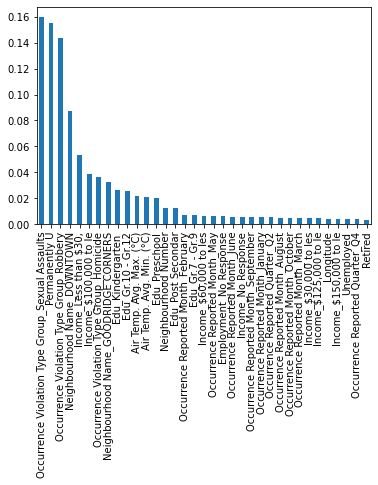

In [40]:
#Embeded Method
randFor = RandomForestRegressor()
x_reg_dum = pd.get_dummies(X, drop_first=True)
x_reg_dum=pd.DataFrame(x_reg_dum)
y_=pd.Series.to_frame(y)
randFor.fit(x_reg_dum,y)
feat_names = x_reg_dum.columns
for_imp = randFor.feature_importances_
forest_imp = pd.Series(for_imp, index=feat_names)
# sort the feature importances in descending order
features_sorted = forest_imp.sort_values(ascending=False)

# print the top 25 important features
top15features=features_sorted[:35]
print(features_sorted[:35])
top15features.plot(kind='bar')



In [41]:
#115 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_regression

# K best - broken out
kb = SelectKBest(score_func=mutual_info_regression, k=115)
kb2 = kb.fit(x_reg_dum,y)
post_c2 = kb2.transform(x_reg_dum)
print("K-Best:", post_c2.shape)

#Print the features
mask = kb2.get_support()
new_features = x_reg_dum.columns[mask]
print("K-Best Features:", new_features)

K-Best: (3217, 115)
K-Best Features: Index(['Neighbourhood Number', 'Latitude', 'Longitude', 'Edu_Preschool',
       'Edu_Kindergarten ', 'Edu_Gr.7 - Gr.9', 'Edu_Gr.10 - Gr.12',
       'Edu_Post Secondar', 'Homemaker', 'Employedage0-30',
       ...
       'Neighbourhood Name_WEST JASPER PLACE',
       'Neighbourhood Name_WEST MEADOWLARK PARK',
       'Neighbourhood Name_WESTMOUNT', 'Neighbourhood Name_WESTRIDGE',
       'Neighbourhood Name_WESTVIEW VILLAGE', 'Neighbourhood Name_YORK',
       'Occurrence Violation Type Group_Sexual Assaults',
       'Occurrence Reported Month_February',
       'Occurrence Reported Month_November',
       'Occurrence Reported Month_October'],
      dtype='object', length=115)
